<a href="https://colab.research.google.com/github/PriyanshuJoshi1982/IPL-Prediction/blob/main/M4_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 0.44954128440366975

Classification Report:
                              precision    recall  f1-score   support

        Chennai Super Kings       0.61      0.59      0.60        37
            Deccan Chargers       0.17      0.50      0.25         2
             Delhi Capitals       0.20      0.14      0.17         7
           Delhi Daredevils       0.50      0.46      0.48        13
              Gujarat Lions       0.67      0.40      0.50         5
             Gujarat Titans       0.67      0.44      0.53         9
            Kings XI Punjab       0.20      0.18      0.19        17
       Kochi Tuskers Kerala       0.00      0.00      0.00         2
      Kolkata Knight Riders       0.33      0.35      0.34        23
       Lucknow Super Giants       0.40      0.67      0.50         3
             Mumbai Indians       0.50      0.65      0.57        26
              Pune Warriors       0.25      0.33      0.29         3
               Punjab Kings       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

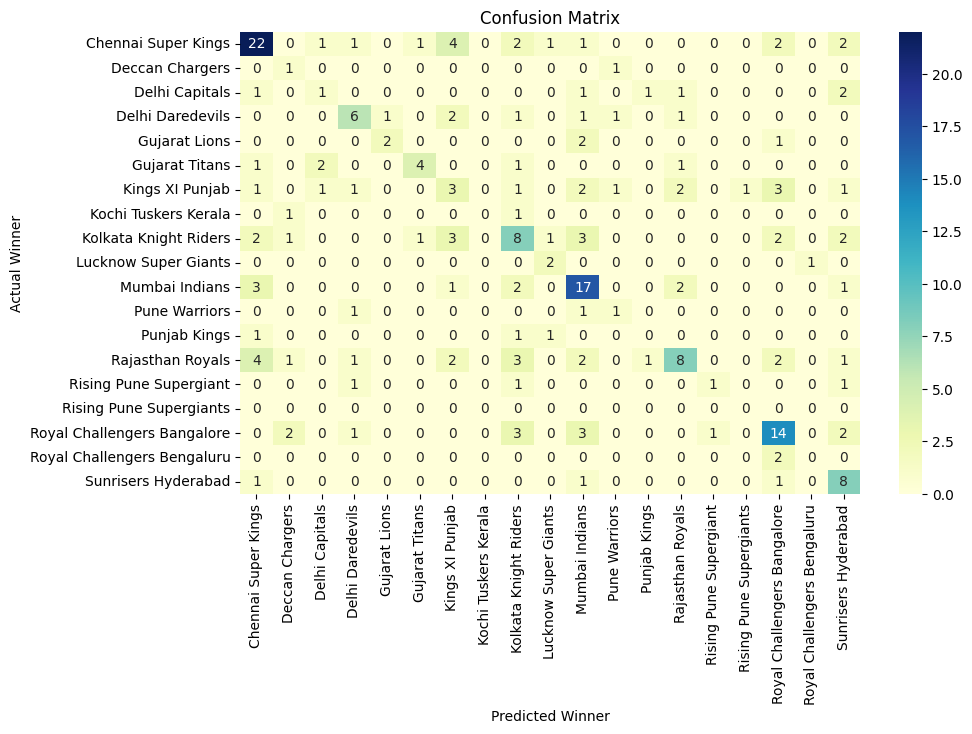

Error: y contains previously unseen labels: 'GT'


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data with correct column names
df = pd.read_csv("/content/M4_Random_Forest.csv", names=[
    'Season', 'City', 'Team1', 'Team2', 'Toss Winner', 'Winner'
], header=0)  # Set header=0 if the CSV has a header row

# Label encoding for categorical columns
le_city = LabelEncoder()
le_team = LabelEncoder()

df['city_enc'] = le_city.fit_transform(df['City'])
df['team1_enc'] = le_team.fit_transform(df['Team1'])
df['team2_enc'] = le_team.transform(df['Team2'])
df['toss_enc'] = le_team.transform(df['Toss Winner'])
df['winner_enc'] = le_team.transform(df['Winner'])

# Season is numeric, no transformation needed
df['season_enc'] = df['Season']

# Feature set
X = df[['season_enc', 'city_enc', 'team1_enc', 'team2_enc', 'toss_enc']]
y = df['winner_enc']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_team.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=le_team.classes_, yticklabels=le_team.classes_, cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.show()

# Prediction function
def predict_match(season, city, team1, team2, toss_winner):
    try:
        city_encoded = le_city.transform([city])[0]
        team1_encoded = le_team.transform([team1])[0]
        team2_encoded = le_team.transform([team2])[0]
        toss_encoded = le_team.transform([toss_winner])[0]
    except ValueError as e:
        return f"Error: {e}"

    input_data = [[season, city_encoded, team1_encoded, team2_encoded, toss_encoded]]
    prediction = rf_model.predict(input_data)[0]
    predicted_team = le_team.inverse_transform([prediction])[0]
    confidence = rf_model.predict_proba(input_data).max()
    return f"Predicted Winner: {predicted_team} (Confidence: {confidence:.2f})"

# Example usage
print(predict_match(2023, "Ahmedabad", "GT", "CSK", "GT"))
